In [2]:
import json, glob
import numpy as np
import xnetwork as xnet
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.ticker import MaxNLocator

In [6]:
def format_title_journal(name1):
    print(name1)
    name = name1.title()
    name = name.replace('Mater', 'Mat')
    name = name.replace('Acs', 'ACS')
    name = name.replace('Appl. Mat. Interfaces', 'AMI')
    return name

In [17]:
n_comm = 14
# files = glob.glob('impact_factor/impact_factor_dist_*010622_IFv2.json')
# files2 = glob.glob('impact_factor_dist_*_231222.json')
print(files)
cmap = plt.get_cmap("tab20")
outer_colors = cmap(np.arange(15))
outer_colors[-1][0] = 0.73
outer_colors[-1][1] = 0.73
outer_colors[-1][2] = 0.73
outer_colors[-1][3] = 1.0
print(outer_colors)

['impact_factor_dist_Adv. Funct. Mater._170423_top15.json']
[[0.12156863 0.46666667 0.70588235 1.        ]
 [0.68235294 0.78039216 0.90980392 1.        ]
 [1.         0.49803922 0.05490196 1.        ]
 [1.         0.73333333 0.47058824 1.        ]
 [0.17254902 0.62745098 0.17254902 1.        ]
 [0.59607843 0.8745098  0.54117647 1.        ]
 [0.83921569 0.15294118 0.15686275 1.        ]
 [1.         0.59607843 0.58823529 1.        ]
 [0.58039216 0.40392157 0.74117647 1.        ]
 [0.77254902 0.69019608 0.83529412 1.        ]
 [0.54901961 0.3372549  0.29411765 1.        ]
 [0.76862745 0.61176471 0.58039216 1.        ]
 [0.89019608 0.46666667 0.76078431 1.        ]
 [0.96862745 0.71372549 0.82352941 1.        ]
 [0.73       0.73       0.73       1.        ]]


In [6]:
files[5:6]

['impact_factor/impact_factor_dist_J. Am. Chem. Soc._010622_IFv2.json']

In [10]:
maxyear = 2020
output_json = dict()
files = ['impact_factor_dist_ACS Appl. Mater. Interfaces_120423.json']
# for file in files + files2:
# for file in files[5:6]:
for file in files:
    journal = format_title_journal(file[len('impact_factor_dist_'):-len('_120423.json')])
    if '0622' in journal:
        journal = 'Nat. Mat.'
        
    min_global = 6666
    max_global = 0
    cits_bardo = json.loads(open(file).read())
    H = []
    for field, impact_per_year in cits_bardo.items():
        min_year = min(impact_per_year.keys())
        print(min_year)
        if int(min_year) < int(min_global):
            min_global = min_year
    min_global = int(min_global)
    i = 0
    labels = []
    sorted_keys = sorted(cits_bardo.keys())
    
    last_if = []
    for field in sorted_keys:
        if i > n_comm:
            break
        i += 1
        impact_per_year = cits_bardo[field]
        IF = []
        for y in range(int(min_global), maxyear+1):
            if str(y) in impact_per_year:
                IF.append(impact_per_year[str(y)])
            else:
                IF.append(0)
        H.append(IF)
        label = field
        label = label[:60] + '\n' + label[60:120] + '\n' + label[120:]
        labels.append(label)
        
        
        last_if.append(IF[-1])
        
    ratio = 0
    if min(last_if) > 0:
        ratio = max(last_if)/min(last_if)
    
    output_json[journal] = dict()
    i = 1
        
    
    for label, IF in zip(labels, H):
        if 'Others' in label:
            label = 'Other'
        output_json[journal][label] = {'x': list(range(int(min_global), maxyear+1)), 'y': IF, 'c':list(outer_colors[i-1]), 'ratio':ratio}
        i += 1


# json_str = json.dumps(output_json)
# out = open('impact_factor_data_to_plot.json', 'w')
# out.write(json_str)
# out.close()

J. Am. Chem. Soc.
1997
1997
1997
1997
1997
1997
1997
1997
1997
1997


Adv. Funct. Mater._17042


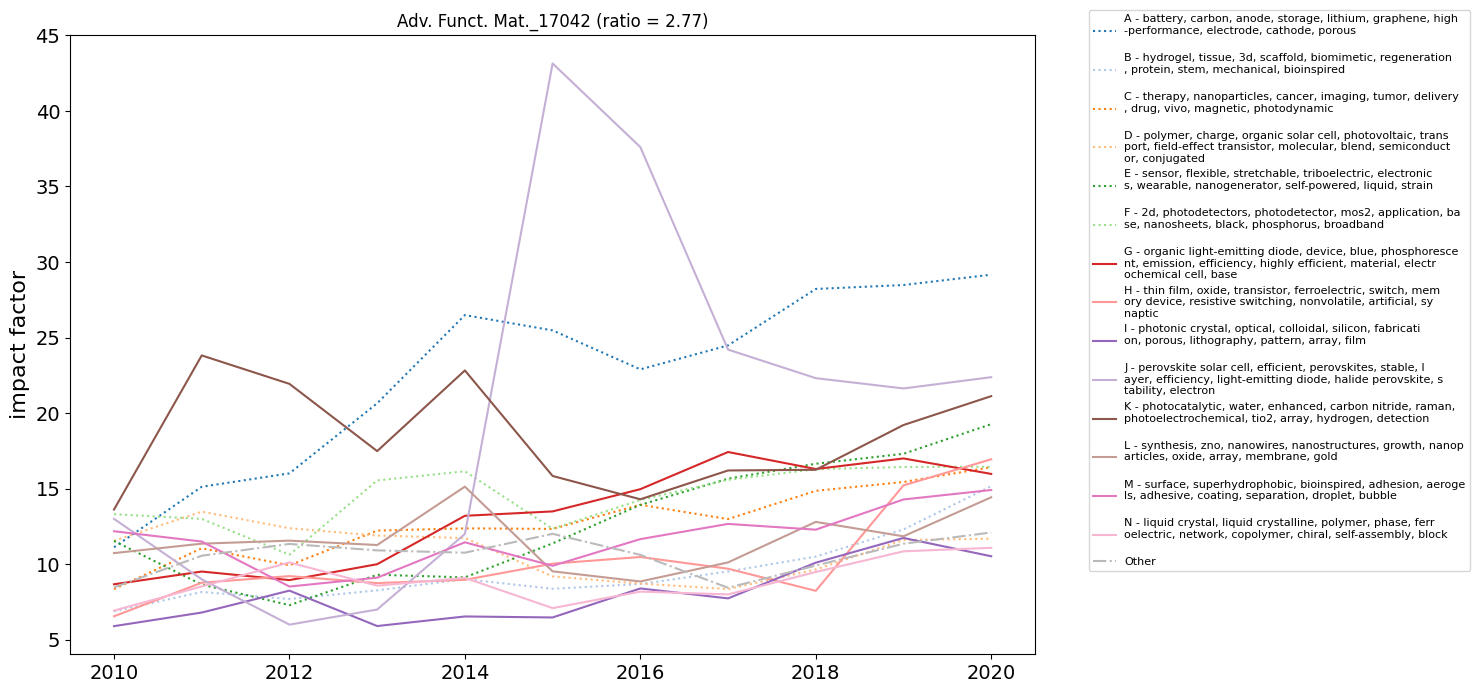

In [19]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
maxyear = 2020
files = ['impact_factor_dist_ACS Appl. Mater. Interfaces_120423.json', 'impact_factor_dist_Adv. Funct. Mater._120423.json']
files = ['impact_factor_dist_Adv. Funct. Mater._170423_top15.json']

for file in files:

    min_global = 6666
    max_global = 0
    cits_bardo = json.loads(open(file).read())
    H = []
    for field, impact_per_year in cits_bardo.items():
        min_year = min(impact_per_year.keys())
        if int(min_year) < int(min_global):
            min_global = min_year
    min_global = int(min_global)
    i = 0
    labels = []
    sorted_keys = sorted(cits_bardo.keys())
    fg = plt.figure(figsize=(15, 7))
    ax = fg.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    last_if = []
    for field in sorted_keys:
        if i > n_comm:
            break
        i += 1
        impact_per_year = cits_bardo[field]
        IF = []
        for y in range(int(min_global), maxyear+1):
            if str(y) in impact_per_year:
                IF.append(impact_per_year[str(y)])
            else:
                IF.append(0)
        H.append(IF)
        label = field
        label = label[:60] + '\n' + label[60:120] + '\n' + label[120:]
        labels.append(label)
        
        
        last_if.append(IF[-1])

    i = 1
    for label, IF in zip(labels, H):
        markercode = 'dotted' if i < 7 else '-'
        if 'Others' in label:
            label = 'Other'
            markercode = '-.'
        plt.plot(list(range(int(min_global), maxyear+1)), IF, label=label, color=outer_colors[i-1], linestyle=markercode)
        i += 1
        
    ratio = 0
    if min(last_if) > 0:
        ratio = max(last_if)/min(last_if)
    plt.title(format_title_journal(file[len('impact_factor_dist_'):-len('_120423.json')]) + " (ratio = %.2f)" % ratio)
    plt.legend(prop={'size': 8}, bbox_to_anchor=(1.05,1.05))
    plt.ylabel('impact factor', fontsize=16)
    
    plt.tight_layout()
    
    plt.savefig(file.replace('.json', '_impact_factor_130423.pdf'))